In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = {"taille": [120, 140, 170, 180],
       "age": [6, 10, 20, 18]}
data = pd.DataFrame(data)

In [3]:
y_true = data["taille"]
X = data[["age"]]

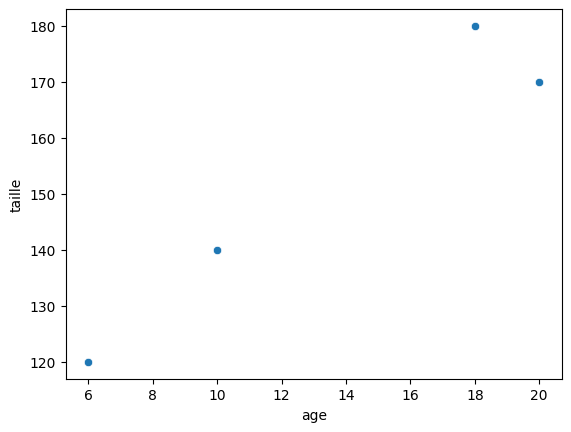

In [4]:
sns.scatterplot(data = data, x = "age", y = "taille");

# Regression Lineaire

In [5]:
from sklearn.linear_model import LinearRegression

# Instanciate Linear model
model = LinearRegression()

In [6]:
model.fit(X,y_true)

LinearRegression()

In [7]:
print('beta_0 intercept =', model.intercept_)
print('beta_1 slope =', model.coef_[0])

beta_0 intercept = 98.39694656488552
beta_1 slope = 4.007633587786258


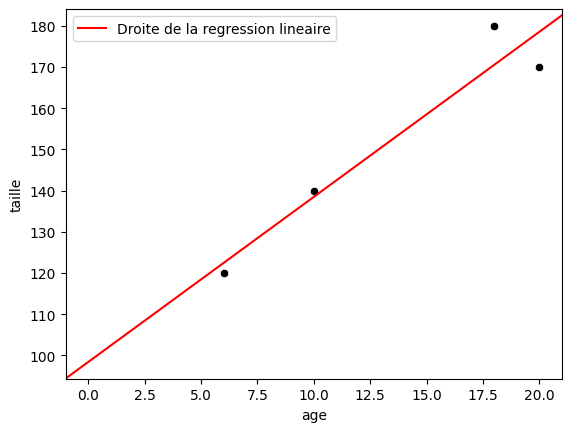

In [8]:
ax = plt.gca()
ax.axline((0, model.intercept_), slope = model.coef_[0], color='red', label='Droite de la regression lineaire')
sns.scatterplot(data = data, x="age", y="taille", color="black",ax=ax);

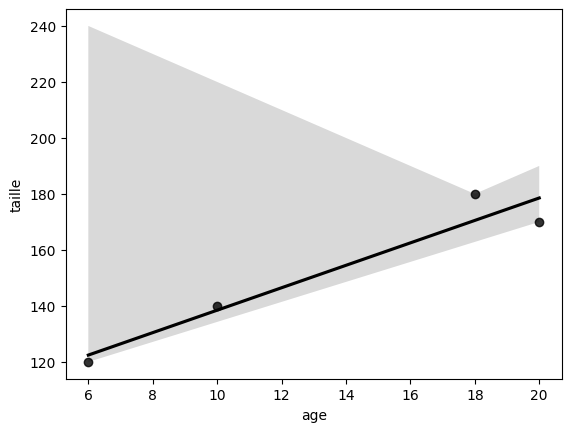

In [9]:
sns.regplot(data = data, x="age", y="taille", color="black");

# Descente de gradient 

## Step 1

In [15]:
b1 = 4 # pente de la droite fixe.
eta = 0.1 # taux d'apprentissage fixe.

# Hypothesis function h
def h(x,b0):
    y_pred = b0 + b1*x
    return y_pred


In [16]:
X_series = X["age"]
intercepte_1 = 35
y_pred = h(X_series,intercepte_1)



In [17]:
y_true

0    120
1    140
2    170
3    180
Name: taille, dtype: int64

In [18]:
y_pred

0     59
1     75
2    115
3    107
Name: age, dtype: int64

In [19]:
def sum_carre_residus(y_true, y_pred):
    erreur = np.sum((y_true - y_pred) ** 2)
    return erreur

def rmse(y_true, y_pred):
    erreur = np.sum(y_true - y_pred)
    return (np.sqrt(sum_carre_residus(y_true, y_pred)) / y_pred.size)

def sum_error_abs(y_true, y_pred):
    return abs(np.sum((y_true - y_pred)))

def mae(y_true, y_pred):
    return sum_error_abs(y_true, y_pred) / y_pred.size

from sklearn.metrics import mean_squared_log_error


In [20]:
sum_carre_residus(y_true, y_pred)

16300

In [21]:
rmse(y_true, y_pred)

31.917863337009262

In [22]:
sum_error_abs(y_true, y_pred)

254

In [23]:
mae(y_true, y_pred)

63.5

## Step 2

In [24]:
derivate_2 = np.sum(-2 * (y_true - y_pred))
derivate_2

-508

In [25]:
step_2 = derivate_2 * eta
step_2

-50.800000000000004

In [26]:
intercepte_2 = intercepte_1 - step_2
intercepte_2

85.80000000000001

In [27]:
y_pred_2 = h(X_series, intercepte_2)

In [28]:
display(sum_carre_residus(y_true, y_pred))
display(sum_carre_residus(y_true, y_pred_2))

16300

816.159999999999

## Step 3 

In [29]:
derivate_3 = np.sum(-2 * (y_true - y_pred_2))
derivate_3

-101.59999999999991

In [30]:
step_3 = derivate_3 * eta
step_3

-10.159999999999991

In [31]:
intercepte_3 = intercepte_2 - step_3
intercepte_3

95.96000000000001

In [32]:
y_pred_3 = h(X_series, intercepte_3)

In [33]:
display(sum_carre_residus(y_true, y_pred))
display(sum_carre_residus(y_true, y_pred_2))
display(sum_carre_residus(y_true, y_pred_3))

16300

816.159999999999

196.80639999999983

## Step n

In [34]:
erreurs = []
intercepte_n = 30
epoch = 10
for epoch in range(epoch):
    y_pred_n = h(X_series, intercepte_n)
    derivate_n = np.sum(-2 * (y_true - y_pred_n))
    step_n = derivate_n * eta
    intercepte_n = intercepte_n - step_n
    erreurs.append(sum_carre_residus(y_true, y_pred_n))



In [35]:
erreurs

[18940,
 921.7599999999987,
 201.0304000000002,
 172.20121600000004,
 171.04804864000005,
 171.00192194559997,
 171.00007687782409,
 171.00000307511294,
 171.00000012300458,
 171.00000000492025]

### Forme de la loss

In [36]:
erreurs_intercepts = []
intercepte_demo_loss = 50
epoch = 100
for epoch in range(epoch):
    y_pred_n = h(X_series, intercepte_demo_loss)
    intercepte_demo_loss = intercepte_demo_loss + 1
    erreurs_intercepts.append([sum_carre_residus(y_true, y_pred_n), intercepte_demo_loss])
    


In [37]:
epoch, intercepte_demo_loss

(99, 150)

In [38]:
intercepte_demo_loss

150

In [39]:
erreurs_intercepts = pd.DataFrame(erreurs_intercepts, columns=["erreurs", 'intercepts'])

In [40]:
erreurs_intercepts

,erreurs,intercepts
0,9580,51
1,9196,52
2,8820,53
3,8452,54
4,8092,55
...,...,...
95,8820,146
96,9196,147
97,9580,148
98,9972,149


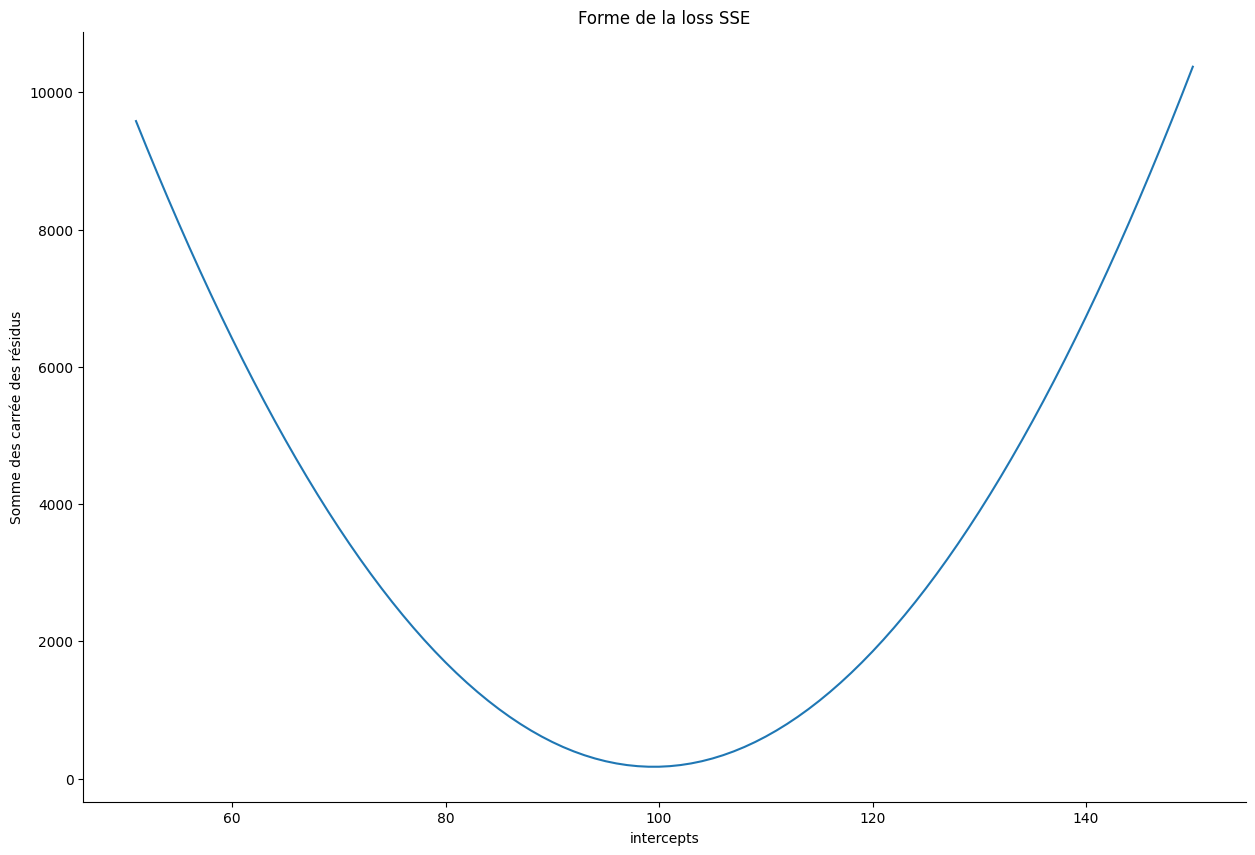

In [41]:
fig, ((ax)) = plt.subplots(1,1, figsize=(15,10))
sns.lineplot(data = erreurs_intercepts,x= "intercepts", y="erreurs",ax=ax)
#plt.plot(erreurs_intercepts["erreurs"])
ax.spines.top.set_visible(None)
ax.spines.right.set_visible(None)
ax.set_title('Forme de la loss SSE')
ax.set_xlabel('intercepts')
ax.set_ylabel('Somme des carrée des résidus')
plt.show()

In [42]:
erreurs_intercepts.sort_values(by="erreurs", ascending=True).head(3)

,erreurs,intercepts
49,172,100
48,172,99
47,180,98


### Refacto

In [43]:
def gradient_descent(epoch, intercepte_n):
    erreurs = []
    for epoch in range(epoch):
        y_pred_n = h(X_series, intercepte_n)
        derivate_n = np.sum(-2 * (y_true - y_pred_n))
        step_n = derivate_n * eta
        intercepte_n = intercepte_n - step_n
        erreurs.append(sum_carre_residus(y_true, y_pred_n))
    return intercepte_n, y_pred_n, erreurs


In [44]:
intercepte_n, y_pred_n, erreurs = gradient_descent(50, 30)

In [45]:
intercepte_n

98.5

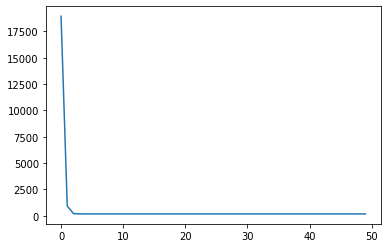

In [41]:
plt.plot(erreurs)
plt.show()

# Other example 1

In [42]:
data = sns.load_dataset('mpg').dropna()

In [43]:
data[["mpg", "horsepower"]]

,mpg,horsepower
0,18.0,130.0
1,15.0,165.0
2,18.0,150.0
3,16.0,150.0
4,17.0,140.0
...,...,...
393,27.0,86.0
394,44.0,52.0
395,32.0,84.0
396,28.0,79.0


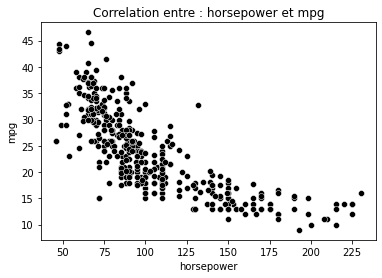

In [44]:
sns.scatterplot(data = data, x="horsepower", y="mpg", color="black");
axe = plt.gca()

axe.set_title("Correlation entre : horsepower et mpg")

plt.show()

In [45]:
X = data[["horsepower"]]
y = data["mpg"]

In [46]:
from sklearn.linear_model import LinearRegression

# Instanciate Linear model
model = LinearRegression()

In [47]:
model.fit(X,y)

LinearRegression()

In [48]:
mae(y, model.predict(X))

2.4651482669227965e-15

In [49]:
print('beta_0 intercept =', model.intercept_)
print('beta_1 slope =', model.coef_[0])

beta_0 intercept = 39.93586102117047
beta_1 slope = -0.15784473335365365


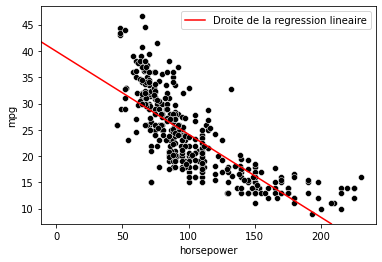

In [50]:
ax = plt.gca()
ax.axline((0, model.intercept_), slope = model.coef_[0], color='red', label='Droite de la regression lineaire')
sns.scatterplot(data = data, x="horsepower", y="mpg", color="black",ax=ax);


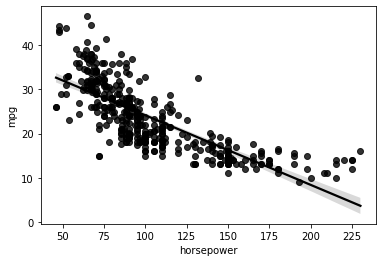

In [51]:
sns.regplot(data = data, x="horsepower", y="mpg", color="black");

In [52]:
b1_slop_update = model.coef_[0] * 1.0 # pente de la droite fixe.
eta = 0.001 # taux d'apprentissage fixe.

# Hypothesis function h
def h_update(x,b0):
    y_pred = b0 + b1_slop_update*x
    return y_pred

In [53]:
import random

In [54]:
X_series

0     6
1    10
2    20
3    18
Name: age, dtype: int64

In [79]:
def gradient_descent_update(epoch, intercepte_n, y_true, X_series):
    erreurs = []
    for epoch in range(epoch):

        
        y_pred_n = h_update(X_series, intercepte_n)
        derivate_n = np.sum(-2 * (y_true - y_pred_n))    
        step_n = derivate_n * eta
        intercepte_n = intercepte_n - step_n
    
        erreurs.append(sum_carre_residus(y_true, y_pred_n))
    return intercepte_n, erreurs, y_pred_n

In [80]:
# Solver SGD : Stochastique descente gradient
#def gradient_descent_update(epoch, intercepte_n, y_true, X_series):
    #erreurs = []
    #for epoch in range(10_000):

        #index = random.choice(range(3))
        
        #y_pred_n = h_update(X_series[index], intercepte_n)
        #derivate_n = np.sum(-2 * (y_true[index] - y_pred_n))    
        #step_n = derivate_n * eta
        #intercepte_n = intercepte_n - step_n
    
        #erreurs.append(sum_carre_residus(y_true, y_pred_n))
    #return intercepte_n, erreurs, y_pred_n

In [81]:
intercepte_n, erreurs, y_pred_n = gradient_descent_update(100, 0,data["mpg"], data["horsepower"] )

In [82]:
mae(y_true, y_pred_n)

1.3881994190325053

In [83]:
intercepte_n

39.93586102117047

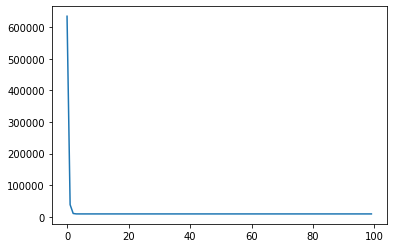

In [84]:
plt.plot(erreurs)
plt.show()

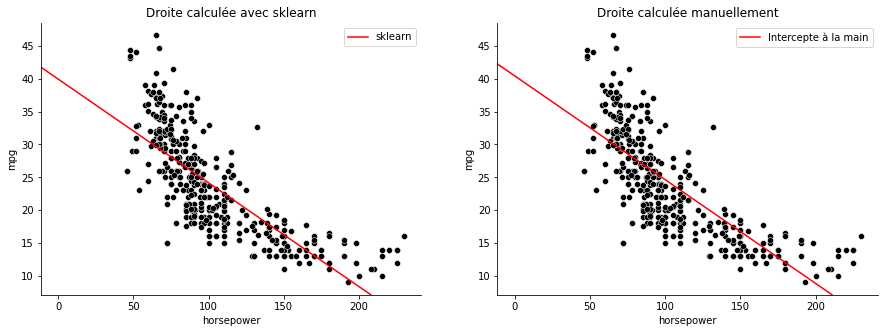

In [60]:
fig, ((ax1,ax2)) = plt.subplots(1, 2, figsize=(15,5))

ax1.axline((0, model.intercept_), slope = model.coef_[0], color='red', label='sklearn')
sns.scatterplot(data = data, x="horsepower", y="mpg", color="black",ax=ax1);
ax1.set_title("Droite calculée avec sklearn")
ax1.spines.top.set_visible(False)
ax1.spines.right.set_visible(False)

ax2.axline((0, intercepte_n), slope = b1_slop_update, color='red', label='Intercepte à la main')
sns.scatterplot(data = data, x="horsepower", y="mpg", color="black",ax=ax2);
ax2.set_title("Droite calculée manuellement")
ax2.spines.top.set_visible(False)
ax2.spines.right.set_visible(False)


plt.show()

## Polynomiale features

In [61]:
from sklearn.preprocessing import PolynomialFeatures

In [62]:
X.head(1)

,horsepower
0,130.0


In [63]:
poly = PolynomialFeatures(degree=2,include_bias=True)

X_poly = poly.fit_transform(X)

In [64]:
pd.DataFrame(X_poly[0])

,0
0,1.0
1,130.0
2,16900.0


In [65]:
pd.DataFrame(X_poly).head(1)

,0,1,2
0,1.0,130.0,16900.0


In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lr = LinearRegression()
lr.fit(X_poly,y)

LinearRegression()

In [68]:
data_poly = pd.DataFrame(X_poly, columns=["cst","hp", "hpp"])

In [69]:
data_poly["y"] = y

In [70]:
data_poly

,cst,hp,hpp,y
0,1.0,130.0,16900.0,18.0
1,1.0,165.0,27225.0,15.0
2,1.0,150.0,22500.0,18.0
3,1.0,150.0,22500.0,16.0
4,1.0,140.0,19600.0,17.0
...,...,...,...,...
387,1.0,86.0,7396.0,38.0
388,1.0,52.0,2704.0,26.0
389,1.0,84.0,7056.0,22.0
390,1.0,79.0,6241.0,32.0


In [71]:
y_poly_pred = lr.predict(X_poly)

In [72]:
X_vs_y_poly_pred = X

In [73]:
X_vs_y_poly_pred["y_poly_pred"] = y_poly_pred

In [74]:
X_vs_y_poly_pred["y_true"] = y

In [75]:
X_vs_y_poly_pred.sort_values(by="horsepower", inplace=True)

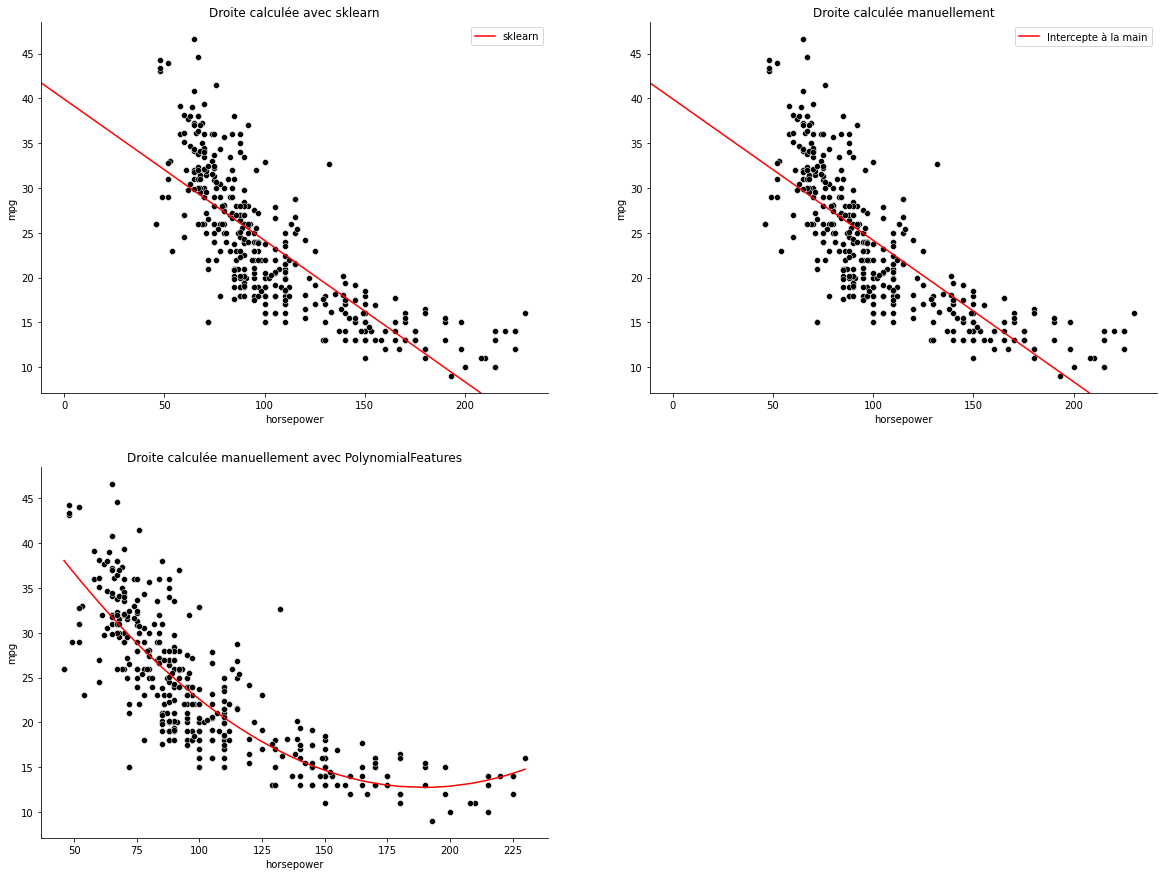

In [85]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(20,15))

ax1.axline((0, model.intercept_), slope = model.coef_[0], color='red', label='sklearn')
sns.scatterplot(data = data, x="horsepower", y="mpg", color="black",ax=ax1);
ax1.set_title("Droite calculée avec sklearn")
ax1.spines.top.set_visible(False)
ax1.spines.right.set_visible(False)

ax2.axline((0, intercepte_n), slope = b1_slop_update, color='red', label='Intercepte à la main')
sns.scatterplot(data = data, x="horsepower", y="mpg", color="black",ax=ax2);
ax2.set_title("Droite calculée manuellement")
ax2.spines.top.set_visible(False)
ax2.spines.right.set_visible(False)

sns.scatterplot(data = data, x="horsepower", y="mpg", color="black",ax=ax3);
ax3.set_title("Droite calculée manuellement avec PolynomialFeatures")
ax3.spines.top.set_visible(False)
ax3.spines.right.set_visible(False)
ax3.plot(X_vs_y_poly_pred["horsepower"], X_vs_y_poly_pred["y_poly_pred"], c="red")

ax4.set_visible(None)
plt.show()

In [77]:
X

,horsepower,y_poly_pred,y_true
19,46.0,38.059191,26.0
102,46.0,38.059191,26.0
326,48.0,37.358153,43.4
325,48.0,37.358153,44.3
244,48.0,37.358153,43.1
...,...,...,...
6,220.0,13.896328,14.0
8,225.0,14.303323,14.0
95,225.0,14.303323,12.0
13,225.0,14.303323,14.0


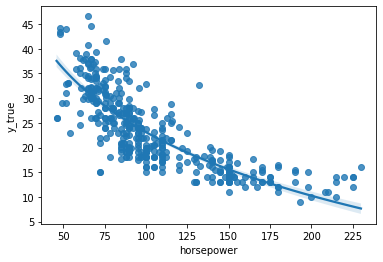

In [78]:
sns.regplot(data=X, x="horsepower", y= "y_true",logx=True );

**Résumé**

**Descente Gradient** : 
* taux d'apprentissage (eta)
* loss (mse, mae...)
* Nombre d'itération (ou epoch)
* solver (momentum, SGD...)

**Feature engineering (poly)**